# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_df = pd.merge(study_results,mouse_metadata,how='left',on='Mouse ID')

# Display the data table for preview
mouse_study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
mouse_study_df['Mouse ID'].nunique()


249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = mouse_study_df.loc[mouse_study_df.duplicated(subset= ['Mouse ID','Timepoint']),'Mouse ID'].unique()

duplicate_mice

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
mouseid_df = mouse_study_df[mouse_study_df['Mouse ID'].isin(duplicate_mice)]

mouseid_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_study_df = mouse_study_df[~mouse_study_df['Mouse ID'].isin(duplicate_mice)]

clean_mouse_study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_study_df['Mouse ID'].nunique()

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = clean_mouse_study_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
median = clean_mouse_study_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
var = clean_mouse_study_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
std = clean_mouse_study_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
SEM = clean_mouse_study_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
drug_regimen_data = pd.DataFrame({'Mean Tumor Volume':mean, 'Median Tumor Volume': median,'Tumor Volume Variance':var, 'Tumor Volume Std.Dev.':std,'Tumor Volume Std. Err.':SEM})


drug_regimen_data

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std.Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

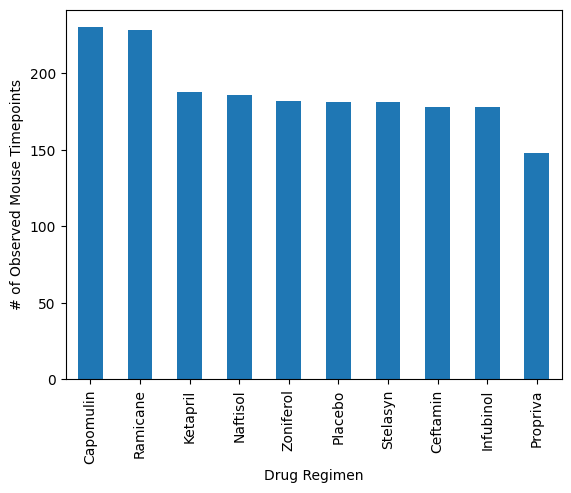

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen_data = clean_mouse_study_df.groupby('Drug Regimen')['Timepoint'].count().sort_values(ascending=False)
drug_regimen_data

drug_regimen_bar = drug_regimen_data.plot(kind='bar')
drug_regimen_bar.set_xlabel('Drug Regimen')
drug_regimen_bar.set_ylabel('# of Observed Mouse Timepoints')

drug_regimen_bar.plot();


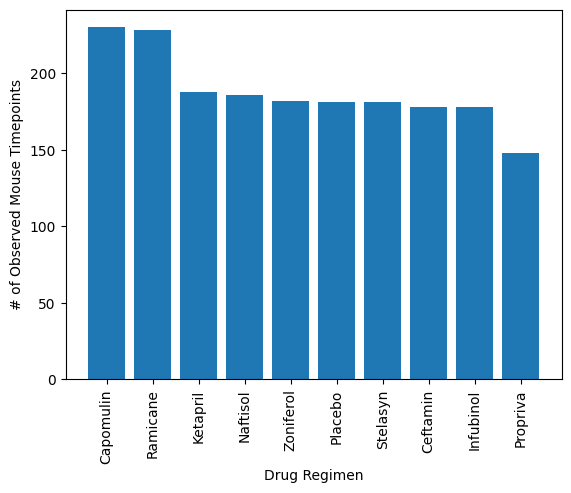

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

x_axis = range(len(drug_regimen_data))
plt.bar(x_axis,drug_regimen_data)
tick_locations =[value for value in x_axis]
plt.xticks(tick_locations,drug_regimen_data.index,rotation='vertical')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

plt.show()

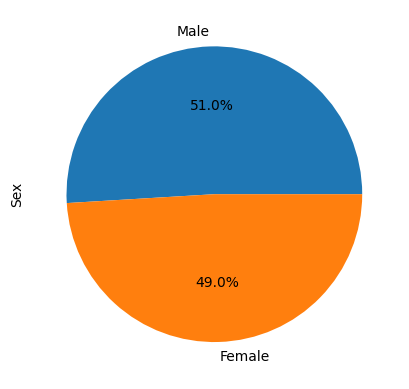

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
female_vs_male = clean_mouse_study_df.groupby('Sex')['Sex'].count().sort_values(ascending=False)
female_vs_male

female_vs_male_pie = female_vs_male.plot(kind='pie',y='Sex',autopct='%1.1f%%')
female_vs_male_pie.plot();

Text(0, 0.5, 'Sex')

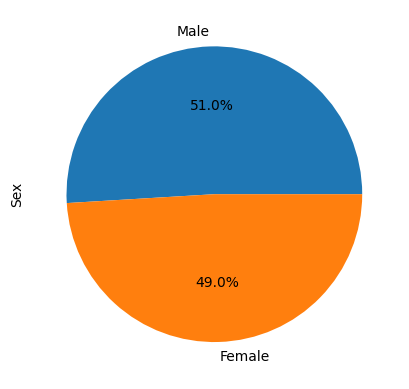

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(female_vs_male,labels=female_vs_male.index,autopct='%1.1f%%')
plt.ylabel('Sex')



## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

mouse_id = clean_mouse_study_df.groupby('Mouse ID')
final_mouse_study_df = mouse_id['Timepoint'].max()
# final_mouse_study_df


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
finalstudy_df=pd.merge(final_mouse_study_df,clean_mouse_study_df,how='left',on=['Mouse ID','Timepoint'])
finalstudy_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
drug_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']


# Create empty list to fill with tumor vol data (for plotting)
outliers=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
# Determine outliers using upper and lower bounds
for treatment in drug_regimens:
    treatment_by_drug = finalstudy_df.loc[finalstudy_df["Drug Regimen"]==treatment,'Tumor Volume (mm3)']
    outliers.append(treatment_by_drug)
    quartiles = treatment_by_drug.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    treatment_outliers = treatment_by_drug.loc[(treatment_by_drug < lower_bound) | (treatment_by_drug > upper_bound)]
    print(f"{treatment}'s potential outliers: {treatment_outliers}")
    


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


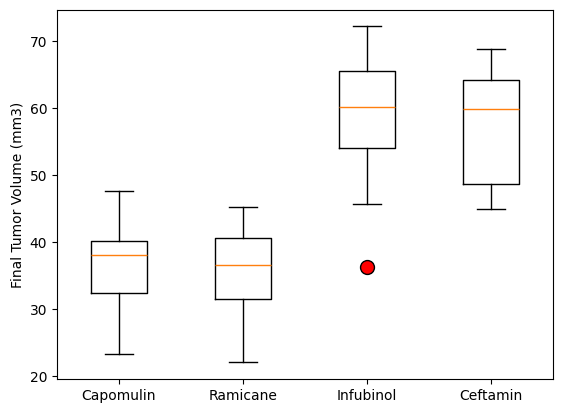

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig,ax = plt.subplots()
ax.set_ylabel('Final Tumor Volume (mm3)')
style=dict(markerfacecolor='red',markersize=10)
ax.boxplot(outliers,labels = drug_regimens, flierprops=style)
plt.show();


## Line and Scatter Plots

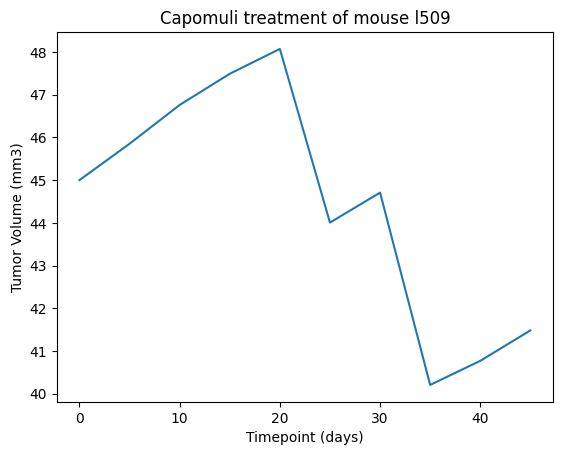

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

l509_df = clean_mouse_study_df.loc[clean_mouse_study_df['Drug Regimen'] == 'Capomulin',:]
l509_mouse = l509_df.loc[l509_df['Mouse ID'] == 'l509']

plt.plot(l509_mouse['Timepoint'],l509_mouse['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomuli treatment of mouse l509')

plt.show()

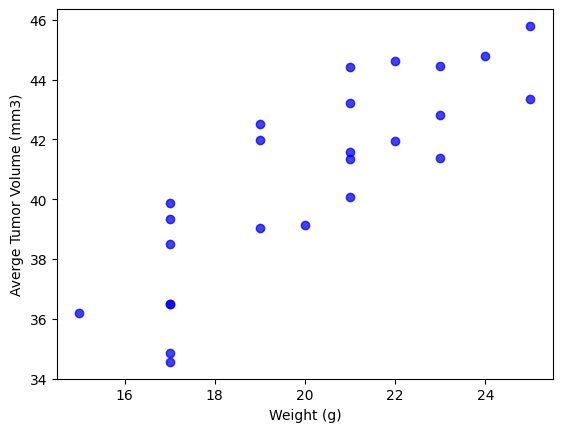

In [18]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_regimen = clean_mouse_study_df.loc[clean_mouse_study_df["Drug Regimen"]=="Capomulin"].groupby('Mouse ID')
average_tumor_volume = capomulin_regimen["Tumor Volume (mm3)"].mean()
mouse_weight = capomulin_regimen['Weight (g)'].unique()

plt.scatter(mouse_weight,average_tumor_volume,marker='o', facecolors='blue',edgecolors='blue', alpha=0.75)
plt.xlabel("Weight (g)")
plt.ylabel('Averge Tumor Volume (mm3)')
plt.show()            

## Correlation and Regression

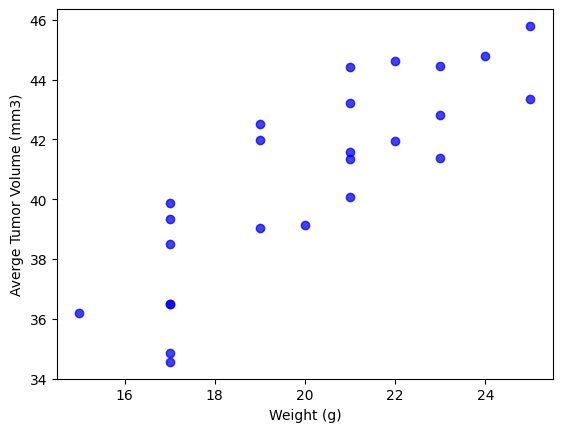

In [20]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
capomulin_regimen = clean_mouse_study_df.loc[clean_mouse_study_df["Drug Regimen"]=="Capomulin"].groupby('Mouse ID')
average_tumor_volume = capomulin_regimen["Tumor Volume (mm3)"].mean()
mouse_weight = capomulin_regimen['Weight (g)'].unique()

plt.scatter(mouse_weight,average_tumor_volume,marker='o', facecolors='blue',edgecolors='blue', alpha=0.75)
plt.xlabel("Weight (g)")
plt.ylabel('Averge Tumor Volume (mm3)')
plt.show()       